<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2023-2024/Practiques/Pr3_Metode_Transformacio_(solucions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pràctica 3: Transformació d'una distribució**

<hr>

**Objectiu de la pràctica**

Emprar el mètode de transformació per transformar nombres aleatoris entre [0,1] perquè segueixin una distribució determinada.

En particular, en aquesta pràctica generarem nombres aleatoris que segueixin una distribució amb aquesta forma, entre $0$ i $\pi$:

$$
  f(x) = \frac{1}{2} sin(x)
$$

El factor 2 prové de la integral analítica de $sin(x)$, així obtenim una normalització adequada de $f(x)$, és a dir, que la seva integral entre 0 i $\pi$ sigui 1:

$$
    \int^\pi_0 sin(x)dx = \left . -\cos (x) \right|^\pi_0 = 2
$$

La funció acumulativa és la integral de $f(x)$, que si ho expressem en funció de $x$, ens queda de forma analítica:

$$
    F(x) = \int^x_0 f(x')dx' = \frac{1}{2}\int^x_0 sin(x')dx' = \frac{1}{2}(\left . -\cos x' \right|^x_0) = \frac{1}{2}(1 - cos(x))
$$
<hr>

### <font color='orange'>**> Python #1**</font>

Primer farem les gràfiques de f(x) i F(x). Defineix les funcions i grafica-les per x $\in$[0,$\pi$]:

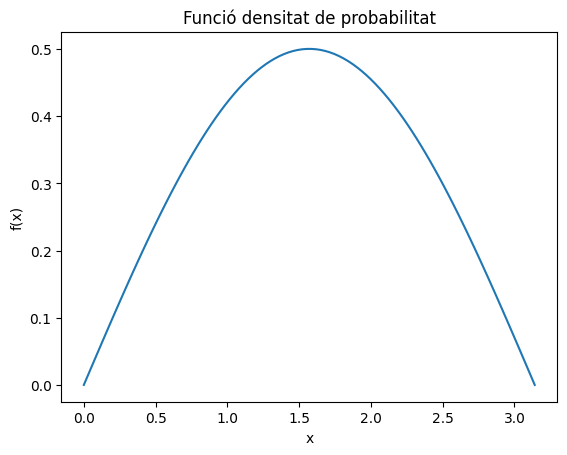

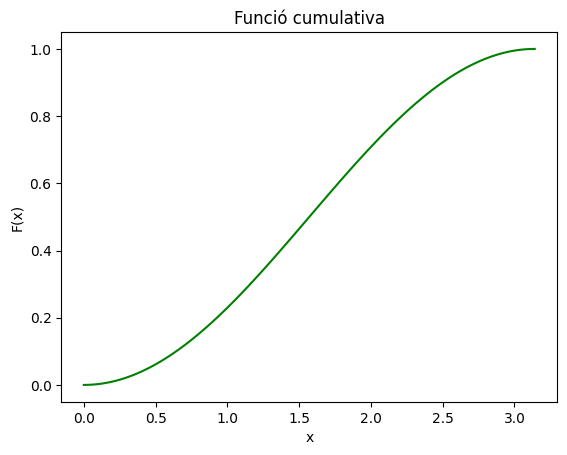

In [ ]:
# Importa las librerias numpy y matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

f = lambda x: 0.5 * np.sin(x)
Fcum = lambda x: 0.5 - 0.5*np.cos(x)

#També es poden definir les funcions de la manera estàndard utilitzant def.
#Tot i que la funció lambda és més ràpida... es faria així:

#def f(x):
#  f=0.5*np.sin(x)
#  return f

#def Fcum(x):
#  Fcum=0.5*(1-np.cos(x))
#  return Fcum

x = np.linspace(0.0, np.pi, 100)

plt.plot(x,f(x),'-')
plt.title("Funció densitat de probabilitat")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

plt.plot(x,Fcum(x),'g-')
plt.title("Funció cumulativa")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

### <font color='orange'>**> Python #2**</font>

Per utilitzar el mètode de transformació, podem expressar F(x) com $u = F(x)$. Si invertim $F(x)$, obtenim:

$$
  x = arccos(1 - 2u)
$$

Si $u$ està distribuït uniformement entre 0 i 1, llavors $x$ estarà distribuït d'acord amb $f(x)$ entre 0 i $\pi$.

Crea una col·lecció de $10^6$ nombres aleatoris distribuïts de forma uniforme entre 0 i 1. Utilitza aquests valors per transformant-los amb aquesta funció. Dibuixa un histograma d'aquests valors transformats.

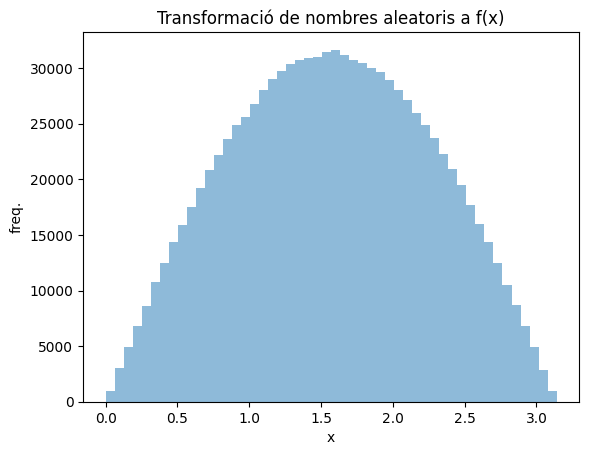

In [ ]:
N = 1000000

#ft = lambda x: np.arccos(1 - 2*x)

def ft(x):
  return np.arccos(1. - 2.*x)

xunif = np.random.uniform(0,1,N)
xt = ft(xunif) # Aquí cogemos el array xunif, y lo convertimos en otro array transformado

plt.hist(xt, bins=50, alpha=0.5) # voilà!
plt.title("Transformació de nombres aleatoris a f(x)")
plt.xlabel("x")
plt.ylabel("freq.")
plt.show()

### <font color='orange'>**> Python #3**</font>

Dibuixa $f(x)$ a sobre d'aquest histograma que has fet. Hauràs de normalitzar l'histograma si vols comparar amb la funció de densitat de probabilitat.

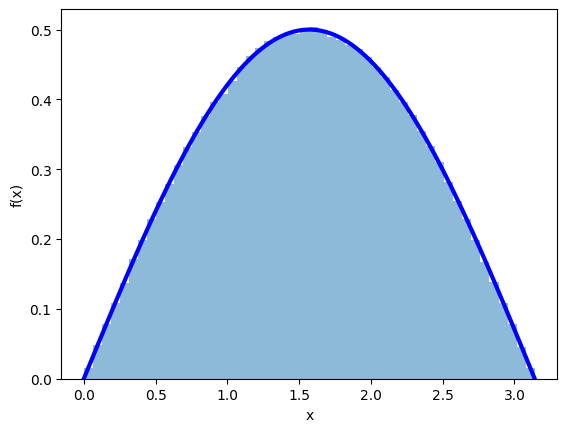

In [ ]:
plt.hist(xt, bins=50, density=True, alpha=0.5)
plt.plot(x,f(x), "b-", lw=3)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

### <font color='green'>**> ENTREGA**</font>


1) Fes servir el mètode de MonteCarlo per a generar uns altres $10^6$ valors que estiguin distribuïts com $f(x)$. Recorda que has de generar valors aleatoris entre o i $\pi$ en $x$, i entre el mínim i el màxim de $f(x)$ per $y$, i comparar per a cada parell de punts $(x_i,y_i)$ si queden per sota de $f(x_i)$. Si és així, ens quedem amb aquests $x_i$, que seguiràn una distribució de probabilitat $f(x)$.

ULL! Pensa quants valors aleatoris has de generar per a obtenir aproximadament $10^6$ valors que compleixin amb la condició! **[2 punts]**

Genera aquests $\sim 10^6$ valors aleatoris pel mètode de MonteCarlo que segueixin $f(x)$ i fes un histograma. **[2 punts]**

Aprox:  999054
orig:  1273220
cut:  1000000


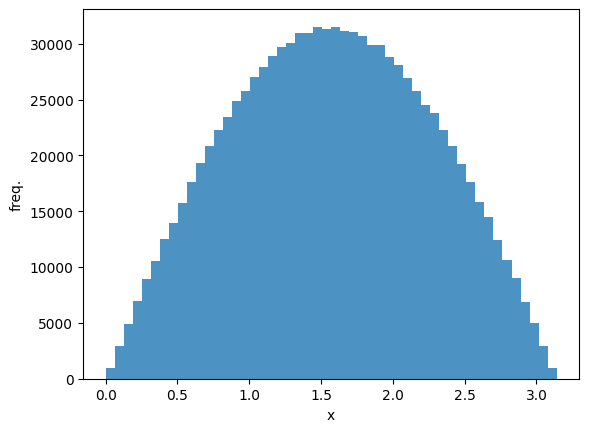

In [ ]:
# Per probabilitat, si tirem valors en aquest interval, la probabilitat que caigui per sota de f(x) té a veure amb les relacions entre àrees.
# la integral de f(x) en aquest interval és 1
# l'àrea de l'interval és pi*0.5, per tant hem de generar N*(pi/2) valors aleatoris

x_t = np.random.uniform(0,np.pi,int(N*np.pi/2))
y_t = np.random.uniform(0,0.5,int(N*np.pi/2))
x_ok = x_t[y_t < f(x_t)]
print("Aprox: ", len(x_ok)) # Veiem que això genera approx. 10^6.

# També podem generar més punts dels que toquen, i quedar-nos 10^6!

x_t = np.random.uniform(0,np.pi,int(N*2)) # Generem més valors que els N*(pi/2)
y_t = np.random.uniform(0,0.5,int(N*2))
x_ok = x_t[y_t < f(x_t)]
print("orig: ", len(x_ok)) # Veiem que això genera més de 10^6.
diff = len(x_ok)-N
x_ok = x_ok[diff:]
print("cut: ", len(x_ok)) # Ens quedem exactament 10^6.


plt.hist(x_ok,bins=50,alpha=0.8)
plt.xlabel("x")
plt.ylabel("freq.")
plt.show()

2) Normalitza aquest histograma, i mostra també l'histograma que has fet a l'apartat "Phython #3" i la funció $f(x)$. Tot en una única gràfica. **[2 punts]**

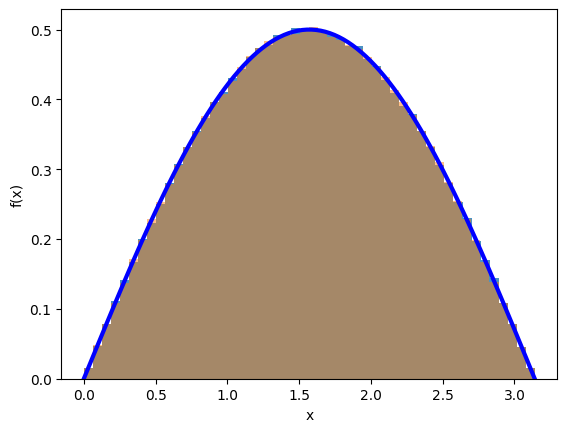

In [ ]:
plt.hist(x_ok,bins=50, density=True,alpha=0.8)
plt.hist(xt,bins=50, density=True,alpha=0.5)
plt.plot(x,f(x), "b-", lw=3)
plt.xlabel("x")
plt.ylabel("f(x)")

plt.show()

3) Farem ara el mateix, però ordenant els valors de aleatoris que has generat i fent una gràfica cumulativa en $x$ per resemblar la funció cumulativa $F(x)$. Això es fa així:

*   Ordena de menor a major els teus valors aleatoris que segueixen $f(x)$
*   Crea una altra llista pels valors en $y$ que sigui vagi de 0 a 1 en pasos de $1/N$.
*   Fes la gràfica d'aquests parells de punts, que seguiràn la distribució de probabilitat cumulativa F(x).

Fes un parell de gràfiques, per a cada mètode d'aquesta pràctica, i posa a damunt també $F(x)". Però genera menys valors per als dos mètodes, diguem-ne N=500 perquè poguem visualitzar millor els resultats! **[4 punts]**


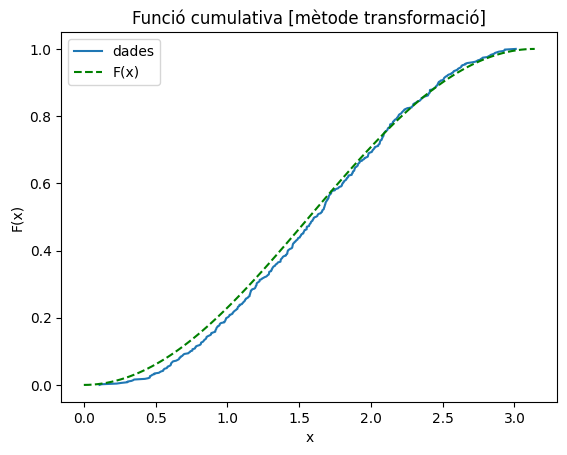

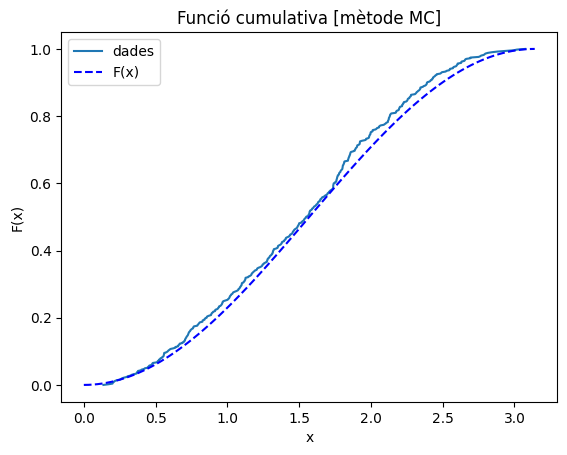

In [ ]:
N=500
xunif = np.random.uniform(0,1,N)
xt = ft(xunif) # Aquí cogemos el array xunif, y lo convertimos en otro array transformado

xt_ord = np.sort(xt)
yt = np.linspace(0,1,len(xt_ord))

plt.plot(xt_ord,yt,'-', label="dades")
plt.plot(x,Fcum(x),'g--', label="F(x)")
plt.title("Funció cumulativa [mètode transformació]")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.show()

x_t = np.random.uniform(0,np.pi,int(N*np.pi/2))
y_t = np.random.uniform(0,0.5,int(N*np.pi/2))

xmc = x_t[y_t < f(x_t)] # Approx. 500 valors

xmc_ord = np.sort(xmc)
ymc = np.linspace(0,1,len(xmc))

plt.plot(xmc_ord,ymc,'-', label="dades")
plt.plot(x,Fcum(x),'b--', label="F(x)")
plt.title("Funció cumulativa [mètode MC]")
plt.xlabel("x")
plt.ylabel("F(x)")
plt.legend()
plt.show()


##Material adicional

Calculem l'àrea de l'histograma no normalitzat i normalitzat per veure que en efecte density=True realitza el que convé.

Això es fa 'capturant' el retorn de la funció hist. El valor de retorn és
una tupla (n, bins, patches), on n és un array amb els continguts per cada bin, bins és un array dels límits inferiors de cada bin, i patches són objectes que identifiquen cada bin (cada rectangle). Sobre patches podem canviar atributs.

Ho veurem en acció:

n: [ 3.  2.  2.  5.  2.  6.  8.  3.  9.  5.  6. 14.  9. 10.  5. 14. 13. 11.
 13. 13. 15. 20. 16. 23. 19. 13. 11. 15. 14. 15. 12. 17.  6. 12. 15. 21.
 20. 12. 15.  9.  5.  6.  9.  7.  6.  4.  4.  1.  2.  3.]
--------------------------------------------------
bins: [0.07999989 0.1407763  0.20155271 0.26232912 0.32310553 0.38388194
 0.44465835 0.50543476 0.56621117 0.62698758 0.68776399 0.7485404
 0.80931681 0.87009322 0.93086962 0.99164603 1.05242244 1.11319885
 1.17397526 1.23475167 1.29552808 1.35630449 1.4170809  1.47785731
 1.53863372 1.59941013 1.66018654 1.72096295 1.78173936 1.84251577
 1.90329218 1.96406859 2.024845   2.08562141 2.14639782 2.20717423
 2.26795064 2.32872705 2.38950346 2.45027987 2.51105628 2.57183269
 2.6326091  2.69338551 2.75416192 2.81493833 2.87571474 2.93649115
 2.99726756 3.05804397 3.11882038]
--------------------------------------------------
patches: <BarContainer object of 50 artists>
--------------------------------------------------
Integral =  30.3882

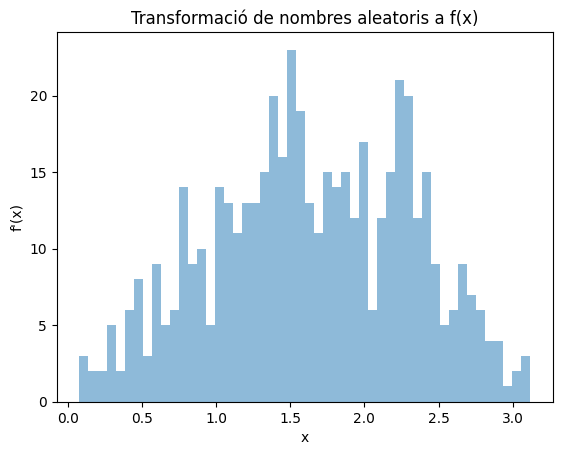

In [ ]:
# Histograma _no_ normalizat:

n, bins, patches = plt.hist(xt, bins=50, alpha=0.5) # Capturem els retorns de hist

print("n:", n) # Això ens dóna el valor de cada bin, és a dir, el valor sobre l'eix i. 50 números
print("-"*50)
print("bins:", bins) # Això ens dóna el valor inferior a x de cada bin. 50 números
print("-"*50)
print("patches:", patches) # Això ens diu que tenim un array d'objectes patches, que podem modificar...
print("-"*50)

# Calculem l'àrea de l'histograma

Integral = 0.
for i in n:
  Integral+=i*(bins[1]-bins[0])
print("Integral = ", Integral)

# Ens fixem que la integral no és 1!!!

plt.title("Transformació de nombres aleatoris a f(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.show()


Ara calculem la integral d'un histograma normalitzat amb density = True. En realitat, Python el que fa és calcular l'àrea de l'histograma original i aplica uns pesos per bin que és bàsicament l'invers de la integral, de manera que ara en calcular l'àrea, sí que en dóna 1:

n: [0.09872251 0.06581501 0.06581501 0.16453752 0.06581501 0.19744503
 0.26326004 0.09872251 0.29616754 0.16453752 0.19744503 0.46070507
 0.29616754 0.32907505 0.16453752 0.46070507 0.42779756 0.36198255
 0.42779756 0.42779756 0.49361257 0.6581501  0.52652008 0.75687261
 0.62524259 0.42779756 0.36198255 0.49361257 0.46070507 0.49361257
 0.39489006 0.55942758 0.19744503 0.39489006 0.49361257 0.6910576
 0.6581501  0.39489006 0.49361257 0.29616754 0.16453752 0.19744503
 0.29616754 0.23035253 0.19744503 0.13163002 0.13163002 0.0329075
 0.06581501 0.09872251]
--------------------------------------------------
bins: [0.07999989 0.1407763  0.20155271 0.26232912 0.32310553 0.38388194
 0.44465835 0.50543476 0.56621117 0.62698758 0.68776399 0.7485404
 0.80931681 0.87009322 0.93086962 0.99164603 1.05242244 1.11319885
 1.17397526 1.23475167 1.29552808 1.35630449 1.4170809  1.47785731
 1.53863372 1.59941013 1.66018654 1.72096295 1.78173936 1.84251577
 1.90329218 1.96406859 2.024845   2.08562141 2.1

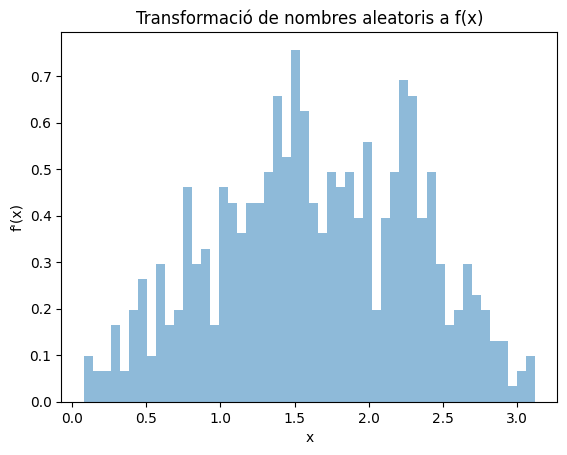

In [ ]:
# Histograma normalizat:

n, bins, patches = plt.hist(xt, bins=50, density=True, alpha=0.5) # Posem density=True i capturem els retorns de hist

print("n:", n) # Això ens dóna el valor de cada bin, és a dir, el valor sobre l'eix i. 50 números
print("-"*50)
print("bins:", bins) # Això ens dóna el valor inferior a x de cada bin. 50 números
print("-"*50)
print("patches:", patches) # Això ens diu que tenim un array d'objectes patches, que podem modificar...
print("-"*50)

# Calculem l'àrea de l'histograma

Integral = 0.
for i in n:
  Integral+=i*(bins[1]-bins[0])
print("Integral = ", Integral)

# Ens fixem que la integral és 1!!!

plt.title("Transformació de nombres aleatoris a f(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.show()

Patches es pot fer servir per canviar els atributs de cada bin, és útil per canviar el color, i posar algun label diferent.

Imagina que vols fer un histograma i vols que el lector vegi ràpidament que una part de 'dades' les has exclòs en una anàlisi, per exemple... es fa usant la funció setp sobre els patches:

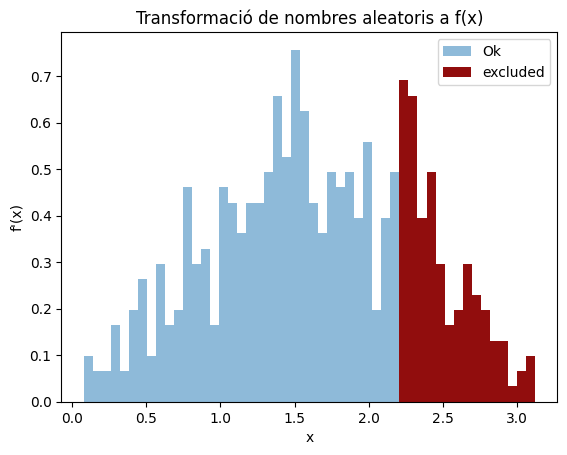

In [ ]:
# Histograma normalizat:

n, bins, patches = plt.hist(xt, bins=50, density=True, alpha=0.5)
plt.setp(patches[35:], 'facecolor', 'darkred') # Posem el color dels darrers 15 bins a vermell
plt.setp(patches[35:], 'alpha', 0.95) # Modifiquem alpha (transparència) dels darrers 15 bins a vermell
plt.setp(patches[35], 'label', "excluded") # els hi posem un label, només als exclosos. Es pot posar també un label pels ok
plt.setp(patches[0], 'label', "Ok") # Només agafem un bin per a posar label, perquè si no sortirien 50 labels...
plt.title("Transformació de nombres aleatoris a f(x)")
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.legend(loc='best') # Añadimos la leyenda, que muestra claramente los valores excluídos, a modo de ejemplo...
plt.show()